# 1. Handwriting Recognition with EM algorithm

Implement the EM algorithm for fitting a Gaussian mixture model for the MNIST handwritten digits dataset. For this question, we reduce the dataset to be only two cases, of
digits “2” and “6” only. Thus, you will fit GMM with C = 2. Use the data file data.mat or
data.dat. True label of the data are also provided in label.mat and label.dat.

The matrix images is of size 784-by-1990, i.e., there are totally 1990 images, and each
column of the matrix corresponds to one image of size 28-by-28 pixels (the image is vectorized; the original image can be recovered by map the vector into a matrix).

First use PCA to reduce the dimensionality of the data before applying to EM. We will
put all “6” and “2” digits together, to project the original data into 5-dimensional vectors.
Now implement EM algorithm for the projected data (with 5-dimensions).


In [360]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import time
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from scipy.stats import multivariate_normal as mvn
from sklearn import preprocessing
from sklearn.cluster import KMeans
np.random.seed(4)

(a) Select one image of “2” and one image of “6”, and visualize the two images.

In [374]:
images = loadmat('data/data.mat')['data']
images = images.T

# images.shape

In [362]:
labels = loadmat('data/label.mat')['trueLabel'][0]
# samples = [images[:, 0], images[:, -1]]
samples = [images[0], images[-1]]

<Figure size 57600x57600 with 0 Axes>

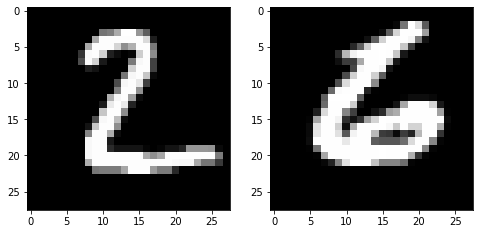

In [363]:
plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (8,8))
ax = axes.ravel()

for i, img in enumerate(samples):
    ax[i].imshow(np.reshape(img, (28, 28)).T, cmap='gray')

(b) Write down detailed expression of the E-step and M-step in the EM algorithm (hint: when computing τ
i
k
, you can drop the (2π)
n/2
factor from the numerator
and denominator expression, since it will be canceled out; this can help avoid some
numerical issues in computation).


*SEE REPORT SECTION ABOVE*

(c) Implement EM algorithm yourself. Use the following initialization

• initialization for mean: random Gaussian vector with zero mean

• initialization for covariance: generate two Gaussian random matrix of size n-byn: S1 and S2, and initialize the covariance matrix for the two components are
Σ1 = S1S
T
1 + In, and Σ2 = S2S
T
2 + In, where In is an identity matrix of size
n-by-n.

Plot the log-likelihood function versus the number of iterations to show your algorithm
is converging.

-----iteration--- 0



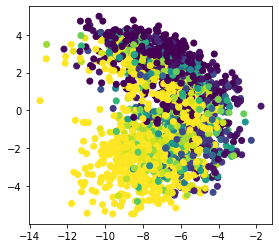

-----iteration--- 1



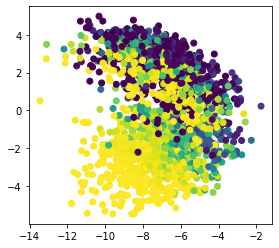

-----iteration--- 2



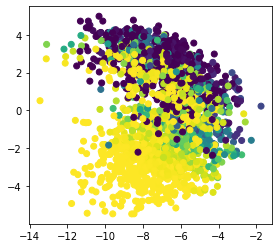

-----iteration--- 3



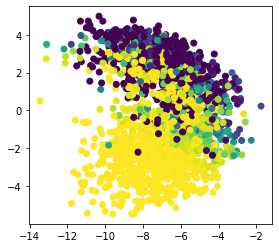

-----iteration--- 4



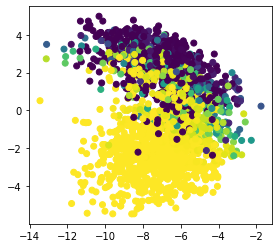

-----iteration--- 5



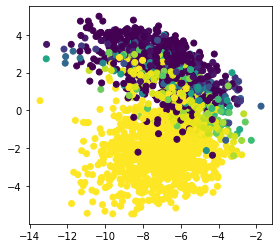

-----iteration--- 6



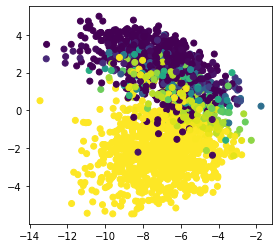

-----iteration--- 7



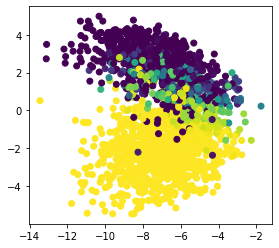

-----iteration--- 8



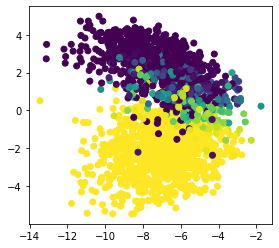

-----iteration--- 9



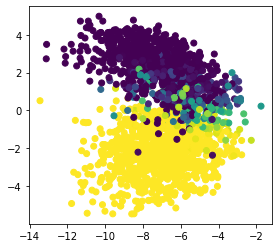

-----iteration--- 10



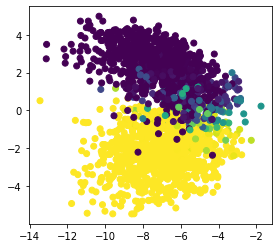

-----iteration--- 11



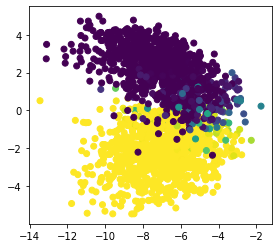

-----iteration--- 12



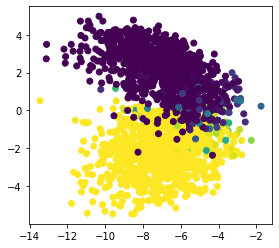

-----iteration--- 13



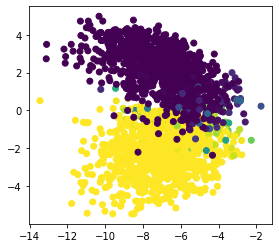

-----iteration--- 14



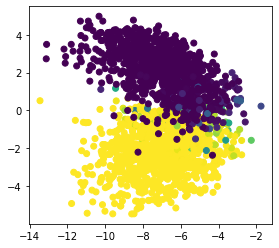

-----iteration--- 15



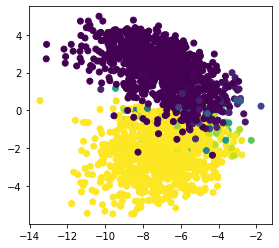

-----iteration--- 16



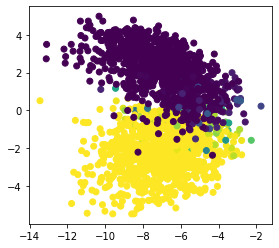

-----iteration--- 17



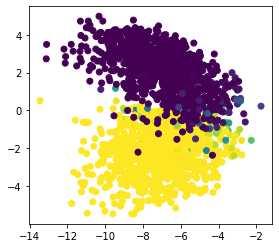

-----iteration--- 18



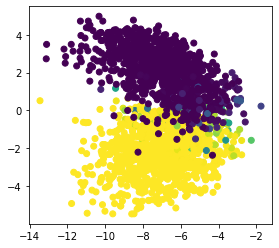

-----iteration--- 19



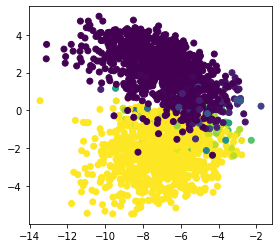

-----iteration--- 20



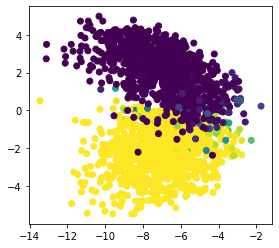

training coverged


In [364]:
ogmean = np.mean(images, axis = 0)
data = np.array(images)
# ndata = preprocessing.scale(data)
ndata = np.array(data)
m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m

# pca the data
d = 5  # reduced dimension
V,_,_ = np.linalg.svd(C)
V = V[:, :d]

# project the data to the top 2 principal directions
pdata = np.dot(ndata,V)
# plt.scatter(pdata[np.where(y == 1),0],pdata[np.where(y == 1),1])
# plt.scatter(pdata[np.where(y == 2),0],pdata[np.where(y == 2),1])
# plt.scatter(pdata[np.where(y == 3),0],pdata[np.where(y == 3),1])
#plt.show()

# EM-GMM for wine data
# number of mixtures
K = 2

# random seed
seed = 9

# initialize prior
np.random.seed(seed)
pi = np.random.random(K)
pi = pi/np.sum(pi)

# initial mean and covariance
# np.random.seed(seed)
mu = np.random.normal(size = (K,5))
mu_old = mu.copy()

sigma = []
for ii in range(K):
    # to ensure the covariance psd
    # np.random.seed(seed)
    dummy = np.random.normal(size = (5, 5))
    ident = np.identity(n = 5)
    sigma.append((dummy@dummy.T) + ident)
    
# initialize the posterior
tau = np.full((m, K), fill_value=0.)

# # parameter for countour plot
# xrange = np.arange(-5, -5, 0.1)
# yrange = np.arange(-5, -5, 0.1)

# ####
maxIter= 100
tol = .0001

plt.ion()
likelihoods = []

for ii in range(100):

    # E-step    
    for kk in range(K):
        tau[:, kk] = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])
    pretau = np.array(tau)
    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (m,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, K)))
    
    
    # M-step
    for kk in range(K):
        # update prior
        pi[kk] = np.sum(tau[:, kk])/m
        
        # update component mean
        mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        # update cov matrix
        dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
        
    print('-----iteration---',ii)    
    print()
    plt.scatter(pdata[:,0], pdata[:,1], c= tau[:,0])
    plt.axis('scaled')
    plt.draw()
    plt.pause(0.1)
    if np.linalg.norm(mu-mu_old) < tol:
        print('training coverged')
        break
    mu_old = mu.copy()
#     likelihood = np.sum(np.log(np.sum(pi*tau, axis = 1)))
    likelihood = np.sum(np.log(np.sum(pi*np.array([pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk]) for kk in range(K)]).T, axis = 1)))
    likelihoods.append(likelihood)
    if ii==99:
        print('max iteration reached')
        break
    

Text(0, 0.5, 'Log-Likelihood')

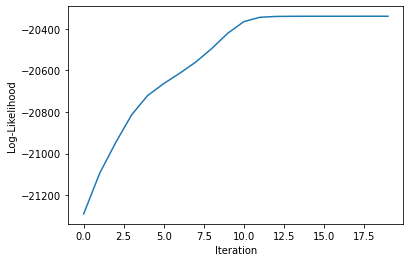

In [365]:
plt.plot(likelihoods)
plt.xlabel('Iteration')
plt.ylabel("Log-Likelihood")

(d) Report, the fitted GMM model when EM has terminated in your algorithms
as follows. Make sure to report the weights for each component, and the mean of each
component (you can reformat the vector to make them into 28-by-28 matrices and
show images). Ideally, you should be able to see these means corresponds to “average”
images. You can report the two 784-by-784 covariance matrices by visualizing their
intensities (e.g., using a gray scaled image or heat map).


In [366]:
# recon = np.sqrt(eigenvals)@eigenvecs@cov[0]@eigenvecs.T@np.sqrt(eigenvals)

1st component weight: 0.49022485396553156
2nd component weight: 0.5097751460344685


<Figure size 57600x57600 with 0 Axes>

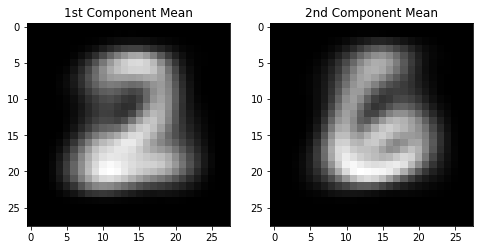

In [367]:
print(f"1st component weight: {pi[0]}")
print(f"2nd component weight: {pi[1]}")

plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (8,8))
ax = axes.ravel()

ax[0].title.set_text('1st Component Mean')
ax[1].title.set_text('2nd Component Mean')

## MEAN IMAGE VIZ
for i in range(2):
#     meanimage = eigenvecs@(mu[i] *eigenvals)
    meanimage = (V@mu[i]) + ogmean
    ax[i].imshow(np.reshape(meanimage, (28, 28)).T, cmap='gray')

Our images look pretty good! The two and the six come through clearly as the first and second component.

<Figure size 57600x57600 with 0 Axes>

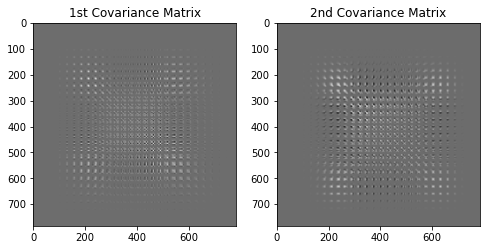

In [368]:
plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (8,8))
ax = axes.ravel()

ax[0].title.set_text('1st Covariance Matrix')
ax[1].title.set_text('2nd Covariance Matrix')

##COVARIANCE VIZ
for i in range(2):
#     meanimage = eigenvecs@mu[i]
    meanimage = V@sigma[i]@V.T
    ax[i].imshow(np.reshape(meanimage, (784, 784)).T, cmap='gray')
    

(e)  Use the τ
i
k
to infer the labels of the images, and compare with the true labels.
Report the mis-classification rate for digits “2” and “6” respectively. Perform K-means
clustering with K = 2 (you may call a package or use the code from your previous
homework). Find out the mis-classification rate for digits “2” and “6” respectively,
and compare with GMM. Which one achieves the better performance?


In [369]:
predicted = np.argmax(tau, axis = 1)
predicted[predicted == 0] = 2
predicted[predicted == 1] = 6
for y in [6, 2]:
    pred = len([x for i, x in enumerate(labels) if predicted[i] == y and labels[i] == y])
    true = len(labels[labels==y])
    rate = pred/true
    print(f"GMM EM mismatch rate for label {y}: {pred} matches out of {true}, {round(rate, 3)} accuracy")


GMM EM mismatch rate for label 6: 952 matches out of 958, 0.994 accuracy
GMM EM mismatch rate for label 2: 968 matches out of 1032, 0.938 accuracy


In [370]:
kmeans = KMeans(n_clusters=2).fit(pdata)


In [371]:
klabs = np.array(kmeans.labels_)
klabs[klabs == 1] = 6
klabs[klabs == 0] = 2
for y in [6,2]:
    pred = len([x for i, x in enumerate(labels) if klabs[i] == y and labels[i] == y])
    true = len(labels[labels == y])
    rate = pred/true
    print(f"K Means mismatch rate for label {y}: {pred} matches out of {true}, {round(rate, 3)} accuracy")


K Means mismatch rate for label 6: 903 matches out of 958, 0.943 accuracy
K Means mismatch rate for label 2: 957 matches out of 1032, 0.927 accuracy


GMM worked better for us than K means. This is the expected result, as the mixed model can more accurately approximate the distribution of the data. The mismatch rate for K means is pretty good for both 6s and 2s, But the GMM model gets more of the "bordelrine" points correct. We can see this in the plots below, which compare the original labels, the GMM labels, and the K Means labels.

<Figure size 57600x57600 with 0 Axes>

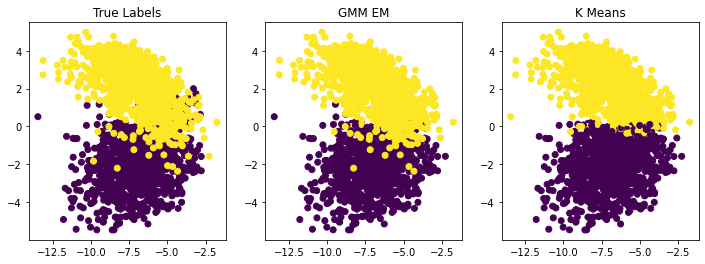

In [372]:
plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (12,4))
ax = axes.ravel()

ax[0].title.set_text('True Labels')
ax[1].title.set_text('GMM EM')
ax[2].title.set_text('K Means')

for i, labelset in enumerate([labels, predicted, klabs]):
# for i, labelset in enumerate([predicted, klabs]):
    ax[i].scatter(pdata[:,0], pdata[:,1], c=labelset.astype(float))
    
